<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from matplotlib.ticker import PercentFormatter

In [2]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None)

taxi.head()

/tmp/ipython-input-2-3351037811.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-05-01 00:37:18,2021-05-01 00:41:07,2.0,0.70,1.0,N,141,263,1,5.0,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0
1,1,2021-05-01 00:43:01,2021-05-01 00:49:19,1.0,1.40,1.0,N,263,75,2,6.5,3.0,0.5,0.00,0.0,0.3,10.30,2.5,0.0
2,1,2021-05-01 00:05:54,2021-05-01 00:31:46,1.0,5.70,1.0,N,142,129,2,21.5,3.0,0.5,0.00,0.0,0.3,25.30,2.5,0.0
3,2,2021-05-01 00:08:21,2021-05-01 00:19:20,1.0,3.04,1.0,N,231,97,1,11.5,0.5,0.5,3.06,0.0,0.3,18.36,2.5,0.0
4,2,2021-05-01 00:32:44,2021-05-01 00:48:44,1.0,4.04,1.0,N,148,17,1,15.5,0.5,0.5,5.79,0.0,0.3,25.09,2.5,0.0


The larger sample the more representative it is

In [6]:
means = []

for i in range(1,100):
  df_probe = taxi.sample(frac=i/100)
  a = df_probe['trip_distance'].mean()
  means.append(a)
  print(f'Mean of df_probe: {a} ({i}% of population)')

Mean of df_probe: 11.642181005943124 (1% of population)
Mean of df_probe: 6.606187028838101 (2% of population)
Mean of df_probe: 9.68257521970936 (3% of population)
Mean of df_probe: 8.037435483227634 (4% of population)
Mean of df_probe: 8.064668980096526 (5% of population)
Mean of df_probe: 9.530758906313363 (6% of population)
Mean of df_probe: 10.783270977447037 (7% of population)
Mean of df_probe: 9.298599334892232 (8% of population)
Mean of df_probe: 7.089868019854636 (9% of population)
Mean of df_probe: 10.63103896518302 (10% of population)
Mean of df_probe: 9.173109593809606 (11% of population)
Mean of df_probe: 8.50425716213566 (12% of population)
Mean of df_probe: 8.374207391907316 (13% of population)
Mean of df_probe: 9.20085345945099 (14% of population)
Mean of df_probe: 7.93411465008802 (15% of population)
Mean of df_probe: 8.025057274696675 (16% of population)
Mean of df_probe: 9.95559260832127 (17% of population)
Mean of df_probe: 9.648953377060804 (18% of population)
Mean

In [10]:
mean = taxi['trip_distance'].mean()

Sample Mean vs Population Mean

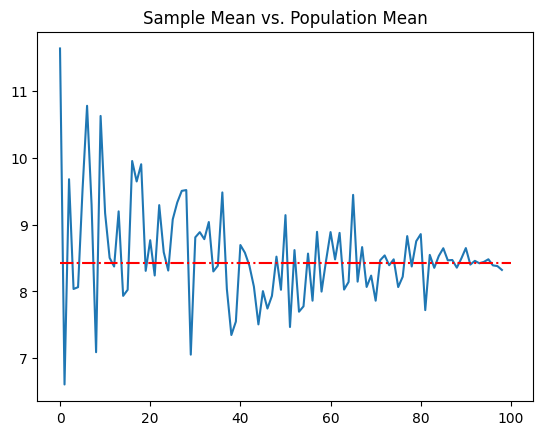

In [16]:
plt.plot(means)
plt.title('Sample Mean vs. Population Mean')
plt.hlines(xmin = 0, xmax = 100, y = mean, color =  'red', linestyles  = 'dashdot')
plt.show()

In [60]:
taxi2 =  pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None, columns = ['tpep_pickup_datetime'])
taxi2 = taxi2.query("tpep_pickup_datetime >= '2021-05-02' and tpep_pickup_datetime < '2021-05-30'")

/tmp/ipython-input-60-1184459636.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  taxi2 =  pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None, columns = ['tpep_pickup_datetime'])


In [61]:
taxi2.head()

,tpep_pickup_datetime
34749,2021-05-02 08:37:03
34750,2021-05-02 09:07:22
40126,2021-05-02 10:17:50
45372,2021-05-02 10:54:31
73490,2021-05-02 00:06:23


In [62]:
cat_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cat_weekdays, ordered=True)
taxi2['day_week'] = taxi2['tpep_pickup_datetime'].dt.day_name().astype(cat_type)

In [63]:
taxi2.tail()

,tpep_pickup_datetime,day_week
2501391,2021-05-29 23:39:34,Saturday
2501392,2021-05-29 23:10:00,Saturday
2501393,2021-05-29 23:53:28,Saturday
2501394,2021-05-29 23:51:00,Saturday
2501395,2021-05-29 23:09:00,Saturday


In [64]:
grouped = taxi2.groupby(['day_week'], as_index=False).count()
grouped

/tmp/ipython-input-64-507682948.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = taxi2.groupby(['day_week'], as_index=False).count()


,day_week,tpep_pickup_datetime
0,Monday,305151
1,Tuesday,337849
2,Wednesday,357989
3,Thursday,356155
4,Friday,367757
5,Saturday,327191
6,Sunday,263298


In [67]:
grouped = grouped.rename(columns = {'tpep_pickup_datetime':'count'})

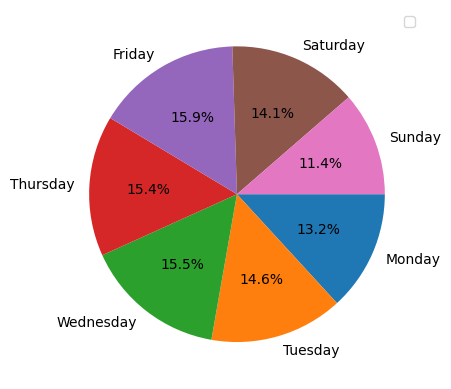

In [82]:
grouped.plot.pie(autopct = '%1.1f%%', counterclock = False, y = 'count', labels = cat_weekdays)
plt.legend("")
plt.ylabel("")
plt.show()

In [84]:
grouped = grouped.sort_values(by = 'count')
grouped

,day_week,count
6,Sunday,263298
0,Monday,305151
5,Saturday,327191
1,Tuesday,337849
3,Thursday,356155
2,Wednesday,357989
4,Friday,367757


In [89]:
grouped['cummulative'] = grouped['count'].cumsum() / grouped['count'].sum() * 100

Text(0.5, 1.0, 'Weekly Counts and Cumulative Percentage')

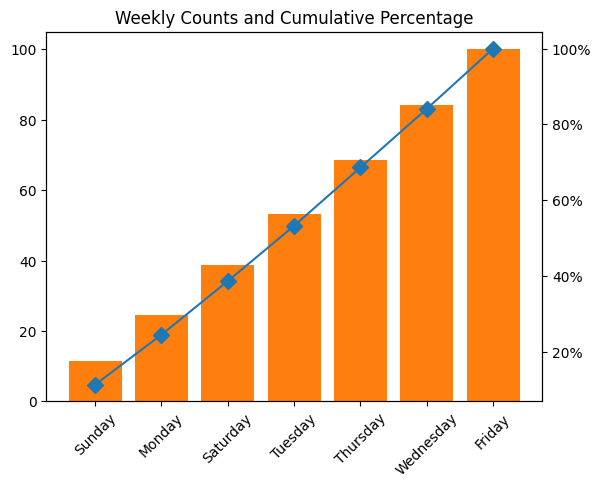

In [112]:
fig, ax = plt.subplots()
ax.bar(grouped['day_week'], grouped['cummulative'], color = 'C1')
ax.tick_params(axis = 'x', rotation = 45)
ax2 = ax.twinx()
ax2.plot(grouped['day_week'], grouped['cummulative'], ms = 8, marker = 'D', color = 'C0')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.title('Weekly Counts and Cumulative Percentage')

In [114]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None)

taxi.head()

/tmp/ipython-input-114-3351037811.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-05-01 00:37:18,2021-05-01 00:41:07,2.0,0.70,1.0,N,141,263,1,5.0,3.0,0.5,2.20,0.0,0.3,11.00,2.5,0.0
1,1,2021-05-01 00:43:01,2021-05-01 00:49:19,1.0,1.40,1.0,N,263,75,2,6.5,3.0,0.5,0.00,0.0,0.3,10.30,2.5,0.0
2,1,2021-05-01 00:05:54,2021-05-01 00:31:46,1.0,5.70,1.0,N,142,129,2,21.5,3.0,0.5,0.00,0.0,0.3,25.30,2.5,0.0
3,2,2021-05-01 00:08:21,2021-05-01 00:19:20,1.0,3.04,1.0,N,231,97,1,11.5,0.5,0.5,3.06,0.0,0.3,18.36,2.5,0.0
4,2,2021-05-01 00:32:44,2021-05-01 00:48:44,1.0,4.04,1.0,N,148,17,1,15.5,0.5,0.5,5.79,0.0,0.3,25.09,2.5,0.0


In [116]:
taxi2 =  pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None, columns = ['payment_type','tpep_pickup_datetime'])
taxi2 = taxi2.query("tpep_pickup_datetime >= '2021-05-02' and tpep_pickup_datetime < '2021-05-30'")

/tmp/ipython-input-116-2634119244.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  taxi2 =  pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, storage_options=None, columns = ['payment_type','tpep_pickup_datetime'])


In [117]:
taxi2 = taxi2.groupby(by = taxi2['payment_type'], as_index=True).count()

In [119]:
taxi2 = taxi2.rename(columns = {'tpep_pickup_datetime':'count'})
taxi2

,count
payment_type,
0,117743
1,1689492
2,487665
3,11723
4,8767


In [121]:
taxi2.rename(index={0: 'Credit card', 1 : 'Cash', 2 : 'No charge', 3 : 'Dispute', 4 :
'Unknown'}, inplace=True)
taxi2

,count
payment_type,
Credit card,117743
Cash,1689492
No charge,487665
Dispute,11723
Unknown,8767


In [122]:
taxi2.sort_values(by = 'payment_type')
taxi2['cumsum'] = taxi2['count'].cumsum() / taxi2['count'].sum() * 100

In [137]:
taxi2.reset_index(inplace = True)
taxi2

,payment_type,count,cumsum
0,Credit card,117743,5.085234
1,Cash,1689492,78.053157
2,No charge,487665,99.115052
3,Dispute,11723,99.621360
4,Unknown,8767,100.000000


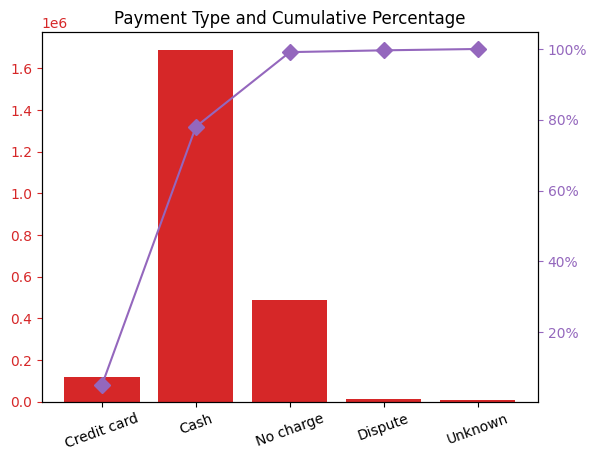

In [148]:
fig, ax = plt.subplots()
ax.bar(taxi2['payment_type'], taxi2['count'], color = 'C3')
plt.title('Payment Type and Cumulative Percentage')
ax2 = ax.twinx()
ax2.plot(taxi2['payment_type'], taxi2['cumsum'], color = 'C4', marker = 'D', ms = 8)
ax2.yaxis.set_major_formatter(PercentFormatter())


ax.tick_params(axis="y", colors="C3")
ax.tick_params(axis="x", rotation = 20)
ax2.tick_params(axis="y", colors="C4")